In [7]:
%%bash
zcat ../../data/annotation_table_rho.txt.gz \
|grep -v "^#" \
| awk '{print $(NF-0)}' \
|sort -n - \
|uniq -c >rho_counts.txt

In [6]:
import pandas as pd
rho_df = pd.read_table('rho_counts.txt', sep="\s", na_values=".", names=['count', 'rho'])
rho_df.head()

print(rho_df.rho.min(), rho_df.rho.max())



/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  


5.6707e-07 11.328


## rho =11??? there are likely very few data points above 1 - 

OK based on figure 1 the vast majority of windows are done by 0.06

so lets go 50 windows from 0 to 0.06

In [42]:
bins = [(i/1000, i/1000 + 1/1000) for i in range(61)]

r_hist  = {}
for b in bins:
    r_hist[b] = {'sites':0, 'COs':0}
    

for l in open('rho_counts.txt'):
    try:
        site_count, rho = int(l.strip().split()[0]), float(l.strip().split()[1])
    except:
        print(l)
        continue
    for b in bins:
        if  b[0] <= rho < b[1]:
            r_hist[b]['sites'] += site_count
            break

            

In [43]:
for l in open("COs_w_mapR_and_2_rhos.txt"):
    #print(l.strip().split())
    rho = float(l.strip().split()[-1])
    for b in bins:
        if  b[0] <= rho < b[1]:
            r_hist[b]['COs'] += 1
            break

In [44]:
r_hist

{(0.0, 0.001): {'COs': 675, 'sites': 49313940},
 (0.001, 0.002): {'COs': 190, 'sites': 15060857},
 (0.002, 0.003): {'COs': 101, 'sites': 9798397},
 (0.003, 0.004): {'COs': 70, 'sites': 6802012},
 (0.004, 0.005): {'COs': 57, 'sites': 5202865},
 (0.005, 0.006): {'COs': 49, 'sites': 3835950},
 (0.006, 0.007): {'COs': 20, 'sites': 2884360},
 (0.007, 0.008): {'COs': 52, 'sites': 2276228},
 (0.008, 0.009000000000000001): {'COs': 34, 'sites': 1868161},
 (0.009, 0.009999999999999998): {'COs': 44, 'sites': 1520476},
 (0.01, 0.011): {'COs': 14, 'sites': 1251499},
 (0.011, 0.012): {'COs': 15, 'sites': 1151775},
 (0.012, 0.013000000000000001): {'COs': 13, 'sites': 1051857},
 (0.013, 0.013999999999999999): {'COs': 10, 'sites': 697920},
 (0.014, 0.015): {'COs': 43, 'sites': 698950},
 (0.015, 0.016): {'COs': 7, 'sites': 491604},
 (0.016, 0.017): {'COs': 7, 'sites': 505524},
 (0.017, 0.018000000000000002): {'COs': 15, 'sites': 493001},
 (0.018, 0.019): {'COs': 4, 'sites': 313409},
 (0.019, 0.02): {'CO

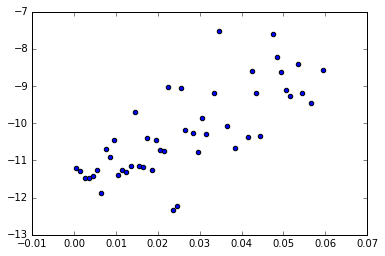

In [45]:

import matplotlib.pyplot
import pylab
import numpy as np 

mid_x = [(b[1] + b[0])/2 for b in bins if r_hist[b]['sites'] >0]
CO_density =  [r_hist[b]['COs']/r_hist[b]['sites'] for b in bins if r_hist[b]['sites'] >0 ]

matplotlib.pyplot.scatter(mid_x,np.log(CO_density))


In [48]:
rho_midpoints = [(b[0]+b[1])/2 for b in bins ]
COs = [r_hist[b]['COs'] for b in bins]
CO_density =  [r_hist[b]['COs']/r_hist[b]['sites'] for b in bins]
sites = [r_hist[b]['sites'] for b in bins]


df = pd.DataFrame.from_dict({'rho_midpoints':rho_midpoints,
                             "COs": COs,
                             "CO_density":CO_density,
                             "sites":sites,
                             "bins":bins
                            })

df['log_CO_density'] = np.log(df.CO_density+1)

In [49]:
df

,CO_density,COs,bins,rho_midpoints,sites,log_CO_density
0,0.000014,675,"(0.0, 0.001)",0.0005,49313940,0.000014
1,0.000013,190,"(0.001, 0.002)",0.0015,15060857,0.000013
2,0.000010,101,"(0.002, 0.003)",0.0025,9798397,0.000010
3,0.000010,70,"(0.003, 0.004)",0.0035,6802012,0.000010
4,0.000011,57,"(0.004, 0.005)",0.0045,5202865,0.000011
5,0.000013,49,"(0.005, 0.006)",0.0055,3835950,0.000013
6,0.000007,20,"(0.006, 0.007)",0.0065,2884360,0.000007
7,0.000023,52,"(0.007, 0.008)",0.0075,2276228,0.000023
8,0.000018,34,"(0.008, 0.009000000000000001)",0.0085,1868161,0.000018
9,0.000029,44,"(0.009, 0.009999999999999998)",0.0095,1520476,0.000029


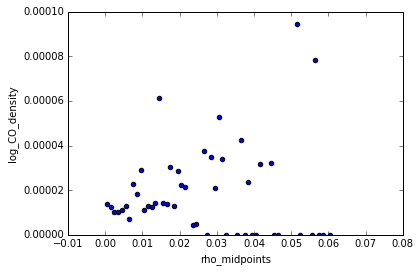

In [51]:
df.plot(kind='scatter', x='rho_midpoints', y='log_CO_density', ylim=(0, 0.0001) )

Correlation:  0.306374353624
(0.30637435362449844, 0.016331754206690859)


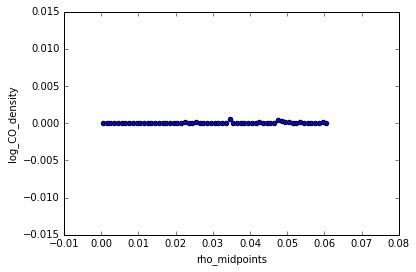

In [53]:
import scipy.stats  as stats

#df_filter = df[(df.sites>500000)]
df_filter = df[df.COs >0]
df_filter = df
df_filter.plot(kind='scatter',x='rho_midpoints',y='log_CO_density')
print("Correlation: ", df_filter.rho_midpoints.corr(df_filter.CO_density))
fit  = stats.pearsonr(df_filter['rho_midpoints'], df_filter['CO_density'])
print(fit)
#df_filter

In [29]:
df.to_csv("rho_to_CO_density.txt")

In [36]:
df.dropna()

,CO_density,COs,bins,rho_midpoints,sites,log_CO_density
0,0.000014,675,"(0.0, 0.001)",0.0005,49313940,-11.199005
1,0.000013,190,"(0.001, 0.002)",0.0015,15060857,-11.280586
2,0.000010,101,"(0.002, 0.003)",0.0025,9798397,-11.482609
3,0.000010,70,"(0.003, 0.004)",0.0035,6802012,-11.484234
4,0.000011,57,"(0.004, 0.005)",0.0045,5202865,-11.421669
5,0.000013,49,"(0.005, 0.006)",0.0055,3835950,-11.268107
6,0.000007,20,"(0.006, 0.007)",0.0065,2884360,-11.879081
7,0.000023,52,"(0.007, 0.008)",0.0075,2276228,-10.686787
8,0.000018,34,"(0.008, 0.009000000000000001)",0.0085,1868161,-10.914105
9,0.000029,44,"(0.009, 0.009999999999999998)",0.0095,1520476,-10.450344
